# Part 1: Pre-processing and EDA
Hayley Caddes

### Problem 1:
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type.

In [2]:
import numpy as np
import pandas as pd


In [3]:
orders = pd.read_csv('data/Orders.csv')
returns = pd.read_csv('data/Returns.csv')

In [4]:
# check profit and sales
orders.info()

# Profit column is of dtype object --> all strings
# Sales column is of dtype object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
Row.ID            51290 non-null int64
Order.ID          51290 non-null object
Order.Date        51290 non-null object
Ship.Date         51290 non-null object
Ship.Mode         51290 non-null object
Customer.ID       51290 non-null object
Customer.Name     51290 non-null object
Segment           51290 non-null object
Postal.Code       9994 non-null float64
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Region            51290 non-null object
Market            51290 non-null object
Product.ID        51290 non-null object
Category          51290 non-null object
Sub.Category      51290 non-null object
Product.Name      51290 non-null object
Sales             51290 non-null object
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null object
Shipping.Cos

In [5]:
orders[['Sales', 'Profit']].head()

,Sales,Profit
0,$221.98,$62.15
1,"$3,709.40",-$288.77
2,"$5,175.17",$919.97
3,"$2,892.51",-$96.54
4,"$2,832.96",$311.52


In [6]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 3 columns):
Returned    1079 non-null object
Order ID    1079 non-null object
Region      1079 non-null object
dtypes: object(3)
memory usage: 25.4+ KB


In [7]:
def fixPrice(x):
    return str(x).replace('$', '').replace(',', '')

orders[['Sales', 'Profit']] = orders[['Sales', 'Profit']].applymap(fixPrice).astype('float')
orders[['Sales', 'Profit']].head()

,Sales,Profit
0,221.98,62.15
1,3709.40,-288.77
2,5175.17,919.97
3,2892.51,-96.54
4,2832.96,311.52


In [8]:
orders[['Sales', 'Profit']].dtypes

Sales     float64
Profit    float64
dtype: object

In [9]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


### Problem 2
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.

In [10]:
orders[['Order.Date', 'Ship.Date']] = orders[['Order.Date', 'Ship.Date']].applymap(lambda x: pd.to_datetime(x, infer_datetime_format=True))

In [11]:
from matplotlib import pyplot as plt


orderTime = orders.groupby('Order.Date').Quantity.sum()


plt.plot(orderTime)

In [12]:
orderTime.head()

Order.Date
2012-01-01    19
2012-01-02     1
2012-01-03    48
2012-01-04    52
2012-01-05    24
Name: Quantity, dtype: int64

In [13]:
orderTimeCat = orders.groupby(['Order.Date', 'Category']).Quantity.sum().reset_index()
orderTimeCat.head()

,Order.Date,Category,Quantity
0,2012-01-01,Furniture,5
1,2012-01-01,Office Supplies,14
2,2012-01-02,Technology,1
3,2012-01-03,Furniture,16
4,2012-01-03,Office Supplies,21


In [14]:
import seaborn as sns

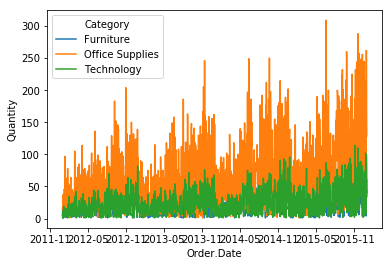

In [15]:
sns.lineplot(x = 'Order.Date', y = 'Quantity', hue = 'Category', data = orderTimeCat)

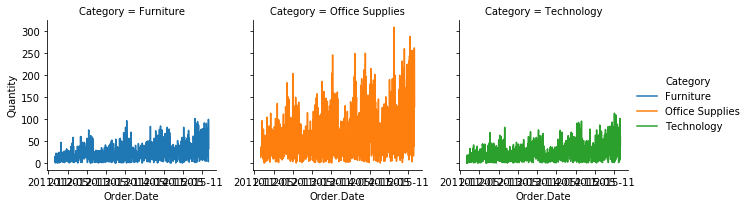

In [16]:
g = sns.FacetGrid(orderTimeCat, col = "Category", hue="Category")
g = (g.map(plt.plot, 'Order.Date', 'Quantity').add_legend())

# Problem 3
Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

	1. How much profit did we lose due to returns each year?


	2. How many customer returned more than once? more than 5 times?


	3. Which regions are more likely to return orders?


	4. Which categories (sub-categories) of products are more likely to be returned?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.

In [17]:
returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [18]:
df = pd.merge(orders, returns, left_on='Order.ID', right_on="Order ID", how='left')
df.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Returned,Order ID,Region_y
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,NaN,NaN,NaN
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,NaN,NaN,NaN
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,NaN,NaN,NaN
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,NaN,NaN,NaN
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,NaN,NaN,NaN


In [22]:
# profit loss

returned = df[~ df["Returned"].isnull()]
returned.sample(4)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Returned,Order ID,Region_y,Year
6840,16789,IT-2012-GD1459091-40988,2012-03-20,2012-03-26,Standard Class,GD-1459091,Giulietta Dortch,Corporate,NaN,Emmen,...,747.30,5,0.5,-89.70,50.030,Medium,Yes,IT-2012-GD1459091-40988,Western Europe,2012
17027,44837,SF-2015-CD1920117-42055,2015-02-20,2015-02-24,Standard Class,CD-1920117,Carlos Daly,Consumer,NaN,Mabopane,...,141.63,1,0.0,36.81,16.300,High,Yes,SF-2015-CD1920117-42055,Southern Africa,2015
41866,3214,MX-2014-TS2120518-41791,2014-06-01,2014-06-05,Standard Class,TS-2120518,Thomas Seio,Corporate,NaN,Porto Alegre,...,19.24,2,0.0,7.68,1.966,Medium,Yes,MX-2014-TS2120518-41791,South America,2014
7711,40503,CA-2014-BT11680140-41751,2014-04-22,2014-04-22,Same Day,BT-116801406,Brian Thompson,Consumer,6460.0,Milford,...,51.84,8,0.0,24.88,2.370,Medium,Yes,CA-2014-BT11680140-41751,Eastern US,2014


In [20]:
df["Year"] = df["Order.Date"].dt.year

In [23]:
lossReturn = returned.groupby(["Year"]).agg({"Profit": "sum"}).reset_index()
lossReturn

,Year,Profit
0,2012,17477.26
1,2013,9269.89
2,2014,17510.63
3,2015,17112.97


In [24]:
# how many customers returned more than once?

customers = returned.groupby(['Customer.ID'])["Order.ID"].nunique().reset_index()
customers.sample(10)

,Customer.ID,Order.ID
158,BT-116801406,1
288,DL-1331582,1
712,MM-1792045,1
776,ON-187151408,1
195,CK-125951406,1
943,SJ-2021554,1
334,EB-1397559,1
492,JE-1547545,1
761,NG-1843018,1
705,ML-1741039,1


In [25]:
more_than_once = customers[customers['Order.ID'] != 1]
more_than_once.head()

,Customer.ID,Order.ID
9,AB-1016545,2
22,AG-1049545,2
58,AM-10705120,2
101,BD-116201406,2
108,BD-162060,2


In [26]:
len(more_than_once)

20

In [27]:
len(more_than_once[more_than_once['Order.ID'] >= 5])

0

In [28]:
regions = df

regions["Returned"] = regions["Returned"].fillna(value="No")
regions.sample(20)
regions = regions.groupby(['Region_x', "Returned"])['Order.ID'].nunique().reset_index()
regions

,Region_x,Returned,Order.ID
0,Canada,No,199
1,Canada,Yes,6
2,Caribbean,No,825
3,Caribbean,Yes,31
4,Central Africa,No,323
5,Central Africa,Yes,10
6,Central America,No,2714
7,Central America,Yes,117
8,Central Asia,No,108
9,Central Asia,Yes,4


In [29]:
piv = regions.pivot(index = "Region_x", columns='Returned', values = "Order.ID")
piv

Returned,No,Yes
Region_x,,
Canada,199,6
Caribbean,825,31
Central Africa,323,10
Central America,2714,117
Central Asia,108,4
Central US,1131,44
Eastern Africa,366,11
Eastern Asia,1109,53
Eastern Europe,761,24


In [30]:
most_likely_region = piv['Yes']/piv['No']
most_likely_region.sort_values(ascending=False)

Region_x
Southern US          0.056555
Southern Europe      0.052733
Eastern US           0.051802
Southern Africa      0.047826
Eastern Asia         0.047791
Oceania              0.046847
Western US           0.046784
Southern Asia        0.045031
Southeastern Asia    0.044047
South America        0.043696
Western Asia         0.043478
North Africa         0.043333
Central America      0.043110
Western Africa       0.042522
Western Europe       0.042131
Northern Europe      0.039305
Central US           0.038904
Caribbean            0.037576
Central Asia         0.037037
Eastern Europe       0.031537
Central Africa       0.030960
Canada               0.030151
Eastern Africa       0.030055
dtype: float64

In [31]:
cats = df

cats["Returned"] = cats["Returned"].fillna(value="No")

cats = cats.groupby(['Category', 'Sub.Category', "Returned"])['Order.ID'].nunique().reset_index()
cats

,Category,Sub.Category,Returned,Order.ID
0,Furniture,Bookcases,No,2186
1,Furniture,Bookcases,Yes,99
2,Furniture,Chairs,No,3064
3,Furniture,Chairs,Yes,132
4,Furniture,Furnishings,No,2832
5,Furniture,Furnishings,Yes,124
6,Furniture,Tables,No,797
7,Furniture,Tables,Yes,38
8,Office Supplies,Appliances,No,1617
9,Office Supplies,Appliances,Yes,59


In [32]:
piv2 = cats.pivot(index = "Sub.Category", columns='Returned', values = "Order.ID")
piv2

Returned,No,Yes
Sub.Category,,
Accessories,2764,129
Appliances,1617,59
Art,4207,187
Binders,5193,239
Bookcases,2186,99
Chairs,3064,132
Copiers,2030,94
Envelopes,2181,91
Fasteners,2383,98


In [33]:
most_likely_sub = piv2['Yes']/piv2['No']
most_likely_sub.sort_values(ascending=False)

Sub.Category
Labels         0.054436
Tables         0.047679
Accessories    0.046671
Copiers        0.046305
Binders        0.046023
Bookcases      0.045288
Art            0.044450
Phones         0.044215
Supplies       0.044077
Furnishings    0.043785
Machines       0.043160
Chairs         0.043081
Paper          0.043039
Storage        0.042475
Envelopes      0.041724
Fasteners      0.041125
Appliances     0.036487
dtype: float64